## Analysis of a Car Sell Dataset Part 2

The goal of this analysis is to train a linear regression model to predict the selling prices of cars 


This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this analysis, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. 

In [21]:
# read dataset
df = pd.read_csv('car_sells_clean_data.csv')

# print total length of dataset
print("Total length of the dataset:", len(df))

Total length of the dataset: 3657


### Explore the Dataset

* Have a rough picture about the data
* Get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* Encode the categorical features first (i.e., seller_type and owner) into numerial values.

#### Dataset exploration

In [4]:
# dataset exploration 1 (display the 5 first rows of the dataset)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
# dataset exploration 2 (display the shape of the dataset)
df.shape

(3657, 8)

In [6]:
# dataset exploration 3 (display the columns and datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


#### Encode categorical data before performing correlation

In [7]:
# import library needed
from sklearn.preprocessing import OrdinalEncoder

# define encoder for 'seller_type', 'fuel', and 'owner' columns
encoder = OrdinalEncoder(categories=[
    ['Individual', 'Dealer'],                           # for seller_type
    ['Petrol', 'Diesel'],                               # for fuel
    ['First Owner', 'Second Owner', 'Third Owner']])    # for owner

# encode the 'seller_type', 'fuel, and 'owner' columns
df[['seller_type', 'fuel', 'owner']] = encoder.fit_transform(df[['seller_type', 'fuel', 'owner']])

# ensure the columns are already encoded in the df
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,0.0,0.0,Manual,0.0
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,0.0,0.0,Manual,0.0
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,1.0,0.0,Manual,0.0
3,Datsun RediGO T Option,2017.0,250000,46000,0.0,0.0,Manual,0.0
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,1.0,0.0,Manual,1.0
...,...,...,...,...,...,...,...,...
3652,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,1.0,0.0,Manual,1.0
3653,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,1.0,0.0,Manual,1.0
3654,Maruti 800 AC BSIII,2009.0,110000,83000,0.0,0.0,Manual,1.0
3655,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,1.0,0.0,Manual,0.0


#### Find correlations with 'selling_price'

In [8]:
# create correlation matrix
corr_matrix = df[['year', 'km_driven', 'seller_type', 'fuel', 'owner', 'selling_price']].corr()

# get correlations of all columns with selling_price
corr_with_selling_price = corr_matrix['selling_price']

print("Correlations of features with selling_price:")
print(corr_with_selling_price)

Correlations of features with selling_price:
year             0.411103
km_driven       -0.177203
seller_type      0.208637
fuel             0.277627
owner           -0.205524
selling_price    1.000000
Name: selling_price, dtype: float64


Based on the correlation performed above, we can infer these details regarding the correlation of the features to selling price:

* Most correlated feature: **year**  
Generally, the correlation results are not as near to one, but the feature year is the most positively correlated to 'selling_price' with **0.411103**  as its value.  
Although it is moderately positive, this correlation tells us that newer cars sold tend to have higher selling prices in the market. 
A higher price for these more recent cars make sense because of the more advanced embedded features, involving the most updated technological features like automated-driving, more efficient designs, more environmentally friendly features and many other factors. 

* Least correlated feature: **owner**  
Owner is the least correlated with the value of **-0.177203**, indicating that it's a negative correlation.  
This means that, as the number of owners increases, the selling price tends to decrease slightly.  
The more owner a car has before its sold, it could lower the car price because there is more wear and tear due to the number of previous owners, or deoptimization of machine performances and engines.

So, we can expect the year feature to have a stronger impact on the prediction outcome. It would be useful to predict selling_price, although it could not be treated as the only determinant. Using more features will contribute to a more robust model, improving the model accuracy. In this case, the feature **fuel** will have a stronger influence on the prediction outcome when combined with the year feature to provide more insight on the trend of a car's selling price in the market. 

Meanwhile the owner feature will have less significant impact on the model's prediction. It might still be valuable to include this feature to ensure that the model captures all potential influences on selling price. Although, we should watch out for overfitting since including a lot of features with weak correlations leads the model to learn irrelevant patterns from the training data. 

Split Training and Testing Data
* To further investigate whether the size of the training/testing data affects the model performance, we are going to randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.

In [9]:
# case 1: training data with 10% of the entire data
train1, test1 = train_test_split(df, train_size=0.1, random_state=142)

# case 2: training data with 90% of the entire dataset
train2, test2 = train_test_split(df, train_size=0.9, random_state=142)

# print shapes of train and test sets for case 1
print("Case 1 (10% training data):")
print("Training set shape:", train1.shape)
print("Testing set shape:", test1.shape)

# print shapes of train and test sets for case 2
print("\nCase 2 (90% training data):")
print("Training set shape:", train2.shape)
print("Testing set shape:", test2.shape)

Case 1 (10% training data):
Training set shape: (365, 8)
Testing set shape: (3292, 8)

Case 2 (90% training data):
Training set shape: (3291, 8)
Testing set shape: (366, 8)


### Q4: Train Linear Regression Models with Feature Selection
* To investigate whether feature selection affects the model performance, we select the two most correlated features and two least correlated features regarding selling_price, respectively.
* The four linear regression models will betrained by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features 
    - (model-b) using the training/testing data in case 1 with two least correlated input features 
    - (model-c) using the training/testing data in case 2 with two most correlated input features 
    - (model-d) using the training/testing data in case 2 with two least correlated input features 
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

#### Train Model A

In [10]:
# define train & test features in model a
X_train_a = train1[['year', 'fuel']]
y_train_a = train1[['selling_price']]

X_test_a = test1[['year', 'fuel']]
y_test_a = test1[['selling_price']]

# train features in model a
reg_a = linear_model.LinearRegression()
reg_a.fit(X_train_a, y_train_a)

LinearRegression()

#### Train Model B

In [11]:
# define train & test features in model b
X_train_b = train1[['owner', 'km_driven']]
y_train_b = train1[['selling_price']]

X_test_b = test1[['owner', 'km_driven']]
y_test_b = test1[['selling_price']]

# train features in model b
reg_b = linear_model.LinearRegression()
reg_b.fit(X_train_b, y_train_b)

LinearRegression()

#### Train Model C

In [12]:
# define train & test features in model c
X_train_c = train2[['year', 'fuel']]
y_train_c = train2[['selling_price']]

X_test_c = test2[['year', 'fuel']]
y_test_c = test2[['selling_price']]

# train features in model c
reg_c = linear_model.LinearRegression()
reg_c.fit(X_train_c, y_train_c)

LinearRegression()

#### Train Model D

In [13]:
# define train & test features in model d
X_train_d = train2[['owner', 'km_driven']]
y_train_d = train2[['selling_price']]

X_test_d = train2[['owner', 'km_driven']]
y_test_d = train2[['selling_price']]

# train features in model d
reg_d = linear_model.LinearRegression()
reg_d.fit(X_train_d, y_train_d)

LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [14]:
# evaluation on model a for both mse and rmse
y_pred_a = reg_a.predict(X_test_a)
mse_a = ((np.array(y_test_a)-y_pred_a)**2).sum()/len(y_test_a)
rmse_a = np.sqrt(mse_a)
print("The MSE for Model A is", mse_a)
print("The RMSE for Model A is", rmse_a)

The MSE for Model A is 237037203355.69495
The RMSE for Model A is 486864.66636601894


In [15]:
# evaluation on model b for both mse and rmse
y_pred_b = reg_b.predict(X_test_b)
mse_b = ((np.array(y_test_b)-y_pred_b)**2).sum()/len(y_test_b)
rmse_b = np.sqrt(mse_b)
print("The MSE for Model B is", mse_b)
print("The RMSE for Model B is", rmse_b)

The MSE for Model B is 282106679257.3627
The RMSE for Model B is 531137.1567282435


In [16]:
# evaluation on model c for both mse and rmse
y_pred_c = reg_c.predict(X_test_c)
mse_c = ((np.array(y_test_c)-y_pred_c)**2).sum()/len(y_test_c)
rmse_c = np.sqrt(mse_c)
print("The MSE for Model C is", mse_c)
print("The RMSE for Model C is", rmse_c)

The MSE for Model C is 182412290275.45224
The RMSE for Model C is 427097.5184608923


In [17]:
# evaluation on model d for both mse and rmse
y_pred_d = reg_d.predict(X_test_d)
mse_d = ((np.array(y_test_d)-y_pred_d)**2).sum()/len(y_test_d)
rmse_d = np.sqrt(mse_d)
print("The MSE for Model D is", mse_d)
print("The RMSE for Model D is", rmse_d)

The MSE for Model D is 299365728362.4965
The RMSE for Model D is 547143.2430017723


### Visualise, Compare and Analyse the Results
* Visualise the results, and perform ___insightful analysis___ on the obtained results. 
* Normally, the model trained with most correlated features and more training data will get better results.

#### Visualisation for models trained with MSE

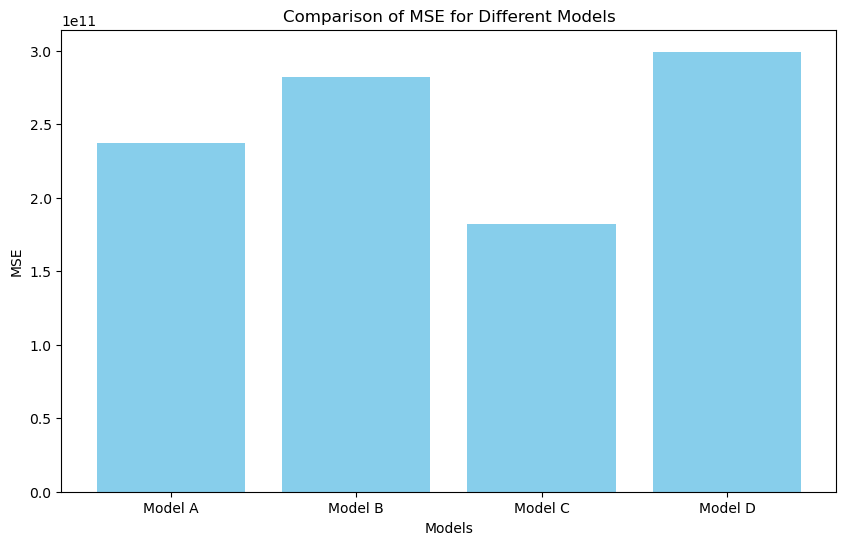

In [18]:
# create lists of model names and MSE values
models = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [mse_a, mse_b, mse_c, mse_d]

# plot data
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Different Models')
plt.show()

From this chart, we can see that Model C has the lowest value of MSE, while Model D has the highest MSE value. 

This means that Model C commonly performs better in terms of prediction accuracy, while Model D is the poorest. 

Subsequently, Model A has the same features included in the correlation, which are year and fuel, differing only from the number of training data used. It tells us that using highly correlated features improves prediction accuracy even though the dataset is smaller. 

This is because the 10% training data limits the model from fully capturing the data's patterns, resulting in a relatively high MSE.   
With its score being lower than Model B, it confirms that year and fuel are indeed strong predictors of selling_price even with less data.

#### Visualisation for models trained with RMSE

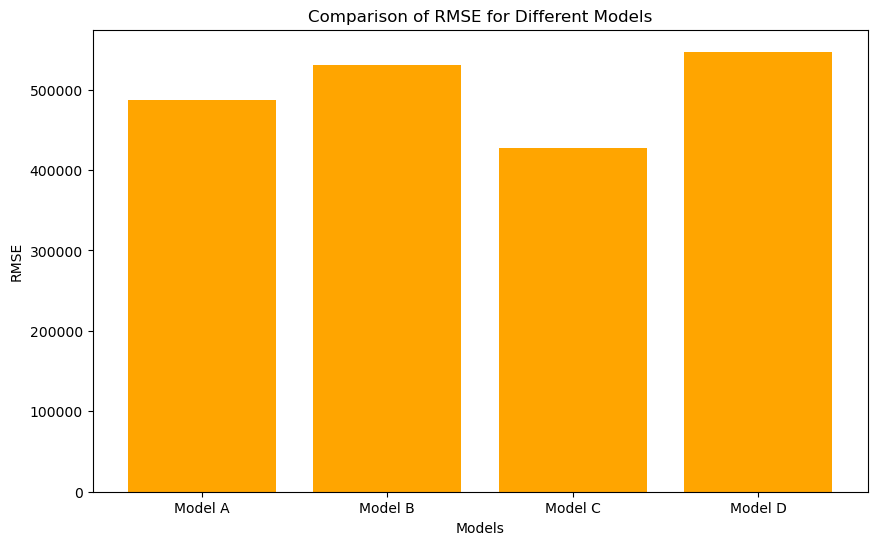

In [19]:
# create lists of model names and MSE values
models = ['Model A', 'Model B', 'Model C', 'Model D']
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

# plot data
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.show()

Similar to the MSE values above, the RMSE test conducted on these different models show the same pattern with Model C as the lowest value and Model D as the highest. Although the gaps between the models are smaller now compared to the MSE test. 

As predicted, Model C  which features the strongest correlations (year and fuel) done on the 90% training data has the lowest MSE and RMSE.   
This confirms that a greater train data size and more informative features can enhance performance by allowing the model to learn more patterns and lower variance.
So, in this case, there is no overfitting or underfitting because the trained model matches our expectation.

However, the models with the two least correlated features (owner and km_driven) are not performing as expected.  
Model D with the bigger data size (90%) has a higher MSE and RMSE value compared to Model B with the 10% train data.  
Despite typically performing better with more training data, Model D might be overfitting to noise rather than meaningful patterns of data, especially when the features incorporated are weakly correlated to selling_price. The noise can be caused by outliers or reduced variance in a larger dataset, reducing the accuracy of the model because of misleading or irrelevant patterns.

Thus, a better feature selection or model tuning is needed to obtain a more effective and accurate model.